In [1]:
import pandas as pd
import seaborn as sns

In [2]:
train = pd.read_csv('Train_Data (1).csv')
test = pd.read_csv('Test_Data (1).csv')
sub = pd.read_csv('Sample_Submission (2).csv')

In [3]:
train.head(5)

,age,sex,bmi,smoker,region,children,charges
0,21.000000,male,25.745000,no,northeast,2,3279.868550
1,36.976978,female,25.744165,yes,southeast,3,21454.494239
2,18.000000,male,30.030000,no,southeast,1,1720.353700
3,37.000000,male,30.676891,no,northeast,3,6801.437542
4,58.000000,male,32.010000,no,southeast,1,11946.625900


def BMI(height,weight,is_metric):
    if (is_metric):
        # Height in meters, weight in kg
        return weight / height**2
    else:
        # Height in inches, weight in lbs
        height = height * 0.0254
        weight = weight * 0.453
        return BMI(height,weight,True)

In [6]:
train.shape

(3630, 7)

In [7]:
test.shape

(492, 6)

In [8]:
def download_preds(preds_test, file_name = 'sub.csv'):

     df = pd.DataFrame()
     ## 1. Setting the target column with our obtained predictions
     df['prediction'] = preds_test
     ## 2. Saving our predictions to a csv file
     df.to_csv(file_name, index = False)


### Feature Engineering

In [9]:
train.isnull().sum()

age         0
sex         0
bmi         0
smoker      0
region      0
children    0
charges     0
dtype: int64

In [10]:
test.isnull().sum()

age         0
sex         0
bmi         0
smoker      0
region      0
children    0
dtype: int64

In [24]:
test.head()

,age,sex,bmi,smoker,region,children
0,40.000000,0,29.900000,0,3,2
1,47.000000,0,32.300000,0,3,1
2,54.000000,1,28.880000,0,0,2
3,37.000000,0,30.568094,0,0,3
4,59.130049,0,33.132854,1,0,4


In [35]:
train.head()

,age,sex,bmi,smoker,region,children,charges
0,21,0,25.745000,0,0,2,3279.868550
1,37,1,25.744165,1,1,3,21454.494239
2,18,0,30.030000,0,1,1,1720.353700
3,37,0,30.676891,0,0,3,6801.437542
4,58,0,32.010000,0,1,1,11946.625900


In [23]:
train['sex'] = train['sex'].replace(("male", "female"),(0,1))
test['sex'] = test['sex'].replace(("male", "female"),(0,1))

train['smoker'] = train['smoker'].replace(("no", "yes"),(0,1))
test['smoker'] = test['smoker'].replace(("no", "yes"),(0,1))

train['region'] = train['region'].replace(("northeast", "southeast", "northwest", "southwest"),(0,1,2,3))
test['region'] = test['region'].replace(("northeast", "southeast", "northwest", "southwest"),(0,1,2,3))

In [22]:
train.region.unique()

array(['northeast', 'southeast', 'northwest', 'southwest'], dtype=object)

In [28]:
train['age'] = train['age'].round(2)
test['age'] = test['age'].round(2)

In [34]:
train['age']= train['age'].astype(int)
test['age']= test['age'].astype(int)

In [43]:
train.head()

,age,sex,bmi,smoker,region,children,charges
0,21,0,25.745000,0,0,2,3279.87
1,37,1,25.744165,1,1,3,21454.49
2,18,0,30.030000,0,1,1,1720.35
3,37,0,30.676891,0,0,3,6801.44
4,58,0,32.010000,0,1,1,11946.63


c:\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='charges', ylabel='Density'>

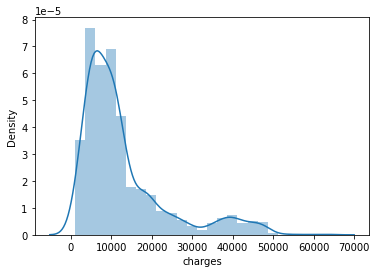

In [48]:
sns.distplot(train.charges, bins = 25) 

In [44]:
train['charges'] = train['charges'].round(4)

In [45]:
X = train.drop(['charges'],axis=1)
y = train['charges']

In [46]:
X.shape,y.shape,test.shape

((3630, 6), (3630,), (492, 6))

In [51]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from math import sqrt

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y, test_size=0.2, random_state =0)

In [66]:
from sklearn.ensemble import AdaBoostRegressor
abr = AdaBoostRegressor(n_estimators=1000,learning_rate=0.0007).fit(X_train,y_train)
#Predicting the Test set results
y_pred_rfr = abr.predict(X_train)
score = r2_score(y_train,y_pred_rfr)
print("Score of Training:",100*score)
train_score = abr.score(X_train,y_train)
test_score = abr.score(X_test,y_test)
print(train_score)
print(test_score)

Score of Training: 79.38943701051906
0.7938943701051906
0.8209312270645606


In [53]:
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [54]:
preds_test = abr.predict(test)
download_preds(preds_test, file_name='model.csv') 

In [78]:
from sklearn.ensemble import GradientBoostingRegressor
abr1 = GradientBoostingRegressor(learning_rate=0.01,n_estimators=10000).fit(X_train,y_train)
#Predicting the Test set results
y_pred_rfr = abr1.predict(X_train)
score = r2_score(y_train,y_pred_rfr)
print("Score of Training:",100*score)
#print("RMSE :" , np.sqrt(mean_squared_error(y_train,y_pred_rfr))) 
#print("Mean Absolute Error",mean_absolute_error(y_test,y_pred_rfr))
train_score = abr1.score(X_train,y_train)
test_score = abr1.score(X_test,y_test)
print(train_score)
print(test_score)

Score of Training: 96.2958221382942
0.962958221382942
0.9001794404774067


In [79]:
preds_test = abr1.predict(test)
download_preds(preds_test, file_name='model1.csv') 